In [1]:
library(MASS)

In [2]:
X_train <- read.csv('trainInput.csv', header = F)
y_train <- read.csv('trainOutput.csv', header = F)
X_test <- read.csv('testInput.csv', header = F)
y_test <- read.csv('testOutput.csv', header = F)
all_training <- t(rbind(X_train, y_train))
all_testing <- t(rbind(X_test, y_test))

In [3]:
image_list = list()
for (i in 0:9){
    image_list[[toString(i)]] <- all_training[all_training[, ncol(all_testing)] == i, -257]
}

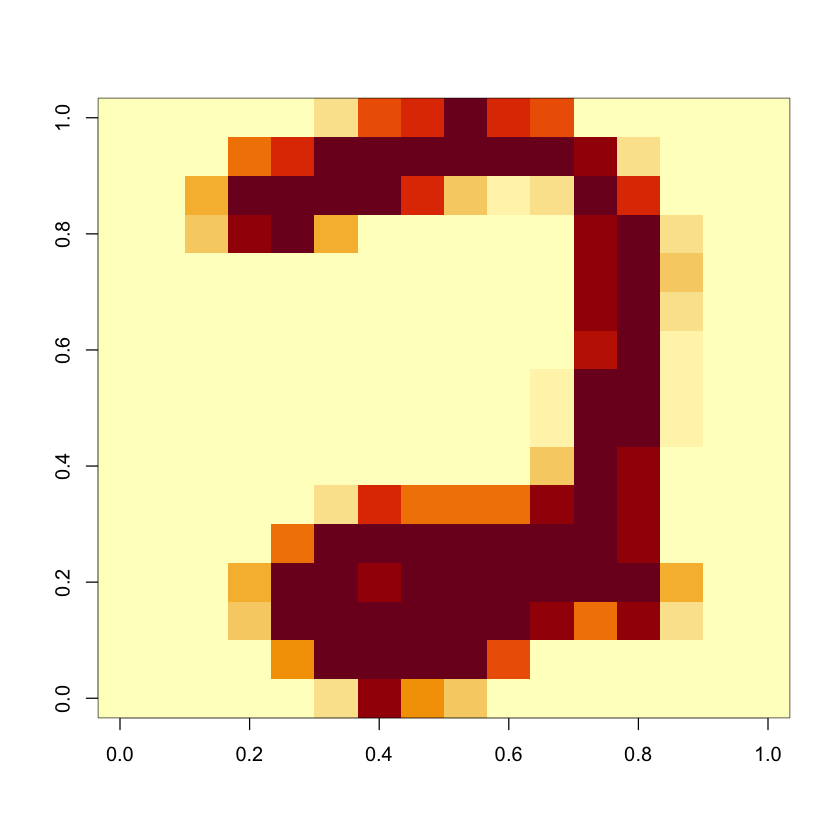

In [4]:
# If you want to display the image, you need to rotate it
two = matrix(image_list[['2']][97,], nrow = 16)
image(two[, 16:1])

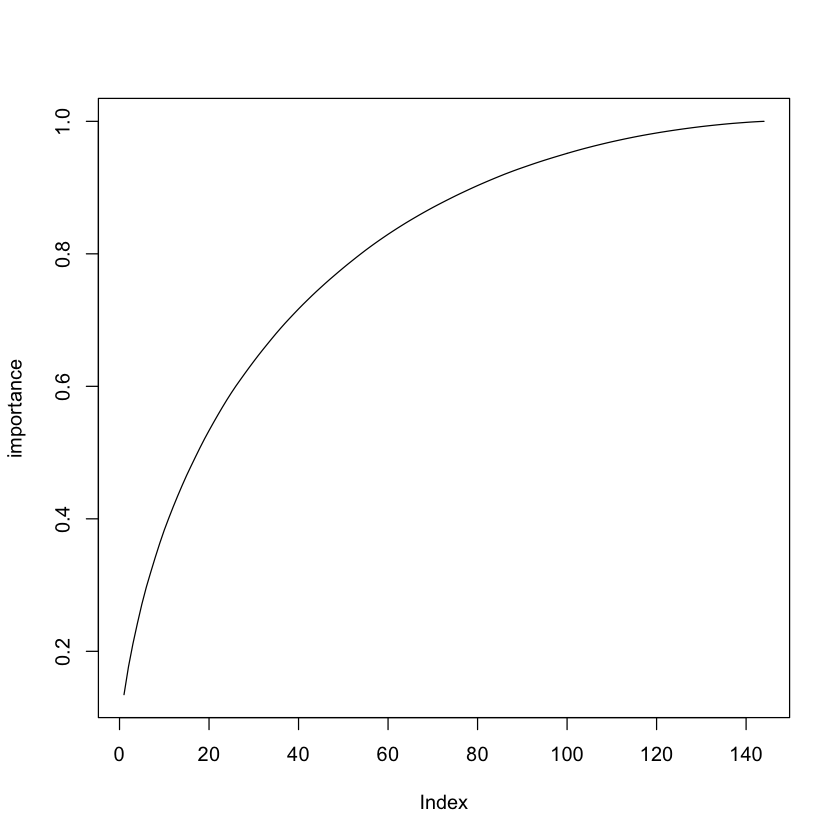

In [5]:
# we can see from the plot that the first 50 decompose values explain the almost 80% of information of the data
SigValDec = svd(image_list[['8']])
plot(cumsum(SigValDec$d) / sum(SigValDec$d), type = 'l', ylab = 'importance')

In [6]:
r_sig_vec <- list()
for (i in 0:9) {
    r_sig_vec[[ toString(i) ]] <- svd(image_list[[ toString(i) ]], nv = 50)$v
}

In [7]:
# the dimension of the right singular vector is 256 * 50
print( dim(r_sig_vec[['0']]))

[1] 256  50


### Algorithm
> if I use Right sigular vector for 0 digit to represent 0, the error will be smaller than 2, 3 or other digits theoretically.

In [26]:
# For example
b <- ginv(r_sig_vec[['0']]) %*% matrix(image_list[['0']][12,], ncol = 1)
zero_for_zero <- norm(matrix(image_list[['0']][12,], ncol = 1) - (r_sig_vec[['0']] %*% b), '2')

b <- ginv(r_sig_vec[['0']]) %*% matrix(image_list[['3']][12,], ncol = 1)
zero_for_three <- norm(matrix(image_list[['3']][12,], ncol = 1) - (r_sig_vec[['0']] %*% b), '2')

print(zero_for_zero)
print(zero_for_three)

[1] 2.185559
[1] 6.931634


In [50]:
Error_tables <- sapply(1: rowNum, function(inx) {
    testImg <- matrix(all_testing[inx, 1:256], ncol = 1)
    sapply(0:9, function(digit) {
        b <- ginv(r_sig_vec[[ toString(digit) ]]) %*% testImg
        error <- norm(testImg - (r_sig_vec[[ toString(digit) ]] %*% b), '2')
        return(error)
    })
})

In [79]:
dim(Error_tables)

[1]   10 2007

In [68]:
inx <- apply(Error_tables, 2, which.min)
prediction <- c('0':'9')[inx]

In [78]:
table(prediction , unlist(all_testing[, 257]))

          
prediction   0   1   2   3   4   5   6   7   8   9
         0 355   0   7   8   0  17   1   0   8   1
         1   1 257   1   0   1   1   0   1   2   3
         2   1   2 178   6   2   0   1   1   3   0
         3   0   1   2 141   0  10   0   0   3   0
         4   1   2   4   0 182   0   3   3   0   2
         5   0   0   0   4   0 125   1   0   3   0
         6   0   2   0   0   2   1 161   0   0   0
         7   0   0   0   0   3   0   0 138   0   2
         8   1   0   6   6   2   3   3   1 145   3
         9   0   0   0   1   8   3   0   3   2 166